<a href="https://colab.research.google.com/github/TankerRongze/ZeRongNSCI0028_Project/blob/main/ELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ELM

In [14]:
from google.colab import files
# To allow access to read google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import scipy.io
input_data = scipy.io.loadmat('/content/drive/MyDrive/Project/processed_data.mat')
input_data

{'X': array([[1.235e+03, 8.700e+02, 5.850e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.216e+03, 8.680e+02, 5.900e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.205e+03, 8.710e+02, 5.880e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [1.203e+03, 8.510e+02, 5.210e+02, ..., 4.500e-03, 1.480e-03,
         0.000e+00],
        [1.193e+03, 8.380e+02, 5.310e+02, ..., 4.720e-03, 1.550e-03,
         0.000e+00],
        [1.246e+03, 8.100e+02, 5.440e+02, ..., 4.500e-03, 1.480e-03,
         0.000e+00]]), 'Y': array([[400. , 505. ,  35. ],
        [398. , 500. ,  36. ],
        [396. , 497. ,  36.5],
        ...,
        [462. , 571. ,  27.5],
        [464. , 577. ,  29. ],
        [510. , 613. ,  25.5]]), '__globals__': [], '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Nov 28 16:39:41 2018', '__version__': '1.0'}

In [16]:
import numpy as np
import sys

# Converting Input Data
raw_data =  input_data['X']
# Print shape of the input raw data
np.shape(raw_data)
# Converting target vector into numpy target vector (Matrix: 63,162 rows X 3 columns)
target_data =  input_data['Y']
# RENAMING input data 
X = raw_data
Y = target_data
# An alternative to have a look of the shape of the input data
# print(X.shape,np.shape(Y), X.dtype,Y.dtype)

**Selecting only one target, NOTE in order to model the three targets given above you need to run this code three times selcting the corresponding output**

In [17]:
#Selecting only one TARGET at a time
T = Y[:,0]
T.shape

(63162,)

# **INCLUDING THE PACKAGE FOR EXTREME LEARNING MACHINE (NOT AVAILLABLE IN STANDARD LIBRARIES OF PYTHON)**

In [18]:
#  Include this to copy elm into your workspace
!cp /content/drive/MyDrive/Project/elm.py /content

# LIBRARIES for plotting results and normalization of input data and Split of Input Data

In [19]:
import elm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_digits, load_diabetes, make_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# Normal distribution
# stdsc = StandardScaler()
# xtoy = stdsc.fit_transform(X)

#______________________________________mapminmax_____Normalization
scaler = MinMaxScaler()
scaler.fit(X)
X_normalized= scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_normalized, T, test_size=0.2,random_state = 42)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(50529, 27) (50529,) (12633, 27) (12633,)


# **Training of PERCEPTRON NEURAL NETWORK (PNN), **
Structure of the PNN and Crossvalidation technique:


1.   Sigmoid for hidden neurons in the hidden layer
2.   Identity function
3.   Hold-out Crossvalidation



In [20]:
# build model and train
model = elm.elm(hidden_units=20, activation_function='sigmoid', random_type='normal', x=x_train, y=y_train, C=5.23, elm_type='reg') 
beta, train_score, running_time = model.fit('solution1')
print("regression beta:\n", beta)
print("regression train score:", train_score)
print("regression running time:", running_time)

regression beta:
 [-321.27229989  845.57309207 -413.91757792  239.37082636  167.15599621
 -568.28401809 -834.3440344  -445.31822558 -719.66790112  524.04399371
 1762.66712622  255.48250054 -584.61892299 -819.28921641 1298.34403423
 -814.7234302   118.73118019 -126.75034251  506.11623526 -420.67246895]
regression train score: 43.86695190899223
regression running time: 0.1199049999999886


# **Plotting Results of Cross-Validation**

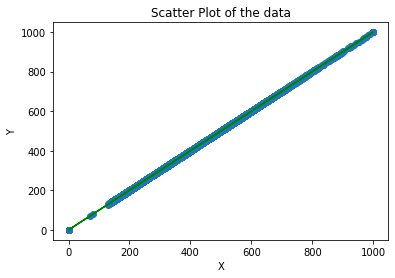

In [21]:
plt.scatter(model.y, y_train)
plt.plot(model.y, model.y,'g-')
plt.title("Scatter Plot of the data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

regression result: [322.0733185  297.73657167 423.04477455 ... 220.10893329 287.03686217
 249.75717909]
regression score: 43.86695190899223
(50529,) (12633,)


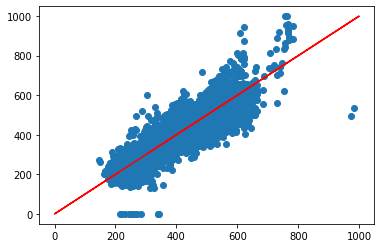

In [22]:
prediction = model.predict(x_test)
# Printing results
print("regression result:", prediction.reshape(-1, ))
print("regression score:", model.score(x_test, y_test))
model.y

plt.scatter(prediction, y_test)
plt.plot(y_test, y_test,'r-')
print(model.y.shape, y_test.shape)